In [1]:
import pandas as pd
import numpy as np

In [2]:
# use the second file
data1_1 = pd.read_csv("20220808-FULL-1_1.csv", sep=';')
# display the data
data1_1

C:\Users\JXN19\AppData\Local\Temp/ipykernel_5272/1951926038.py:2: DtypeWarning: Columns (5,36,86,89) have mixed types. Specify dtype option on import or set low_memory=False.
  data1_1 = pd.read_csv("20220808-FULL-1_1.csv", sep=';')


,fileGenerationDate,Entity_LogicalId,Entity_EU_ReferenceNumber,Entity_UnitedNationId,Entity_DesignationDate,Entity_DesignationDetails,Entity_Remark,Entity_SubjectType,Entity_SubjectType_ClassificationCode,Entity_Regulation_Type,...,Citizenship_LogicalId,Citizenship_RegulationLanguage,Citizenship_Remark,Citizenship_Regulation_Type,Citizenship_Regulation_OrganisationType,Citizenship_Regulation_PublicationDate,Citizenship_Regulation_EntryIntoForceDate,Citizenship_Regulation_NumberTitle,Citizenship_Regulation_Programme,Citizenship_Regulation_PublicationUrl
0,08/08/2022,13,EU.27.28,NaN,NaN,NaN,(UNSC RESOLUTION 1483),P,person,regulation,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,08/08/2022,13,EU.27.28,NaN,NaN,NaN,(UNSC RESOLUTION 1483),P,person,regulation,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,08/08/2022,13,EU.27.28,NaN,NaN,NaN,(UNSC RESOLUTION 1483),P,person,regulation,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,08/08/2022,13,EU.27.28,NaN,NaN,NaN,(UNSC RESOLUTION 1483),P,person,regulation,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,08/08/2022,13,EU.27.28,NaN,NaN,NaN,(UNSC RESOLUTION 1483),P,person,regulation,...,1.0,EN,NaN,regulation,commission,2003-07-08,2003-07-07,1210/2003 (OJ L169),IRQ,http://eur-lex.europa.eu/LexUriServ/LexUriServ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21790,08/08/2022,143389,EU.8692.54,NaN,2022-07-21,NaN,(Date of UN designation: 2022-07-21),P,person,amendment,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21791,08/08/2022,143389,EU.8692.54,NaN,2022-07-21,NaN,(Date of UN designation: 2022-07-21),P,person,amendment,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21792,08/08/2022,143389,EU.8692.54,NaN,2022-07-21,NaN,(Date of UN designation: 2022-07-21),P,person,amendment,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21793,08/08/2022,143389,EU.8692.54,NaN,2022-07-21,NaN,(Date of UN designation: 2022-07-21),P,person,amendment,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
# get the whole name attribute
whole_name = data1_1['NameAlias_WholeName']

In [4]:
def cp(C,D):
    cend=[]
    a=-1
    b=-1
    m=-1
    n=-1
    target=-1
    if C==''or D=='':
        s=1   
    else:
        for i in range(len(C)):
            t=1
            for j in range(len(D)):
                if C[i]== D[j]:
                    a=i
                    b=j
                    m=a
                    n=b
                while m < len(C) and n<len(D) and C[a:m+1]==D[b:n+1]:
                    m=m+1
                    n=n+1
                long=m-a
                if long >= t:
                    t = long
                    target = m
            
            x=target-1
            y=n-1
            if b <len(D) and C[i]==D[b] :
                cend.append(x)
            else:
                cend.append(i)
        s_AB = len(set(cend))
        z = C.find(D);
        if z!=-1:
            ss=s_AB-1;
        else:
            ss = s_AB
        s=ss/len(C)    
    return s     

In [5]:
def distCPD(C,D):
    s1 = cp(C,D);
    s2 = cp(D,C);
    dist = 0.5*(s1+s2);
    return dist

In [6]:
len(whole_name)

21795

In [7]:
# so I replaced them with empty strings
whole_name.fillna('', inplace=True)
whole_name

0             Saddam Hussein Al-Tikriti
1                               Abu Ali
2                              Abou Ali
3                                      
4                                      
                      ...              
21790       Евгений Витальевич БАЛИЦКИЙ
21791    Yevgeniy Vitalievich BALYTSKIY
21792    Jevgenij Vitaljevitj BALITSKIJ
21793                                  
21794                                  
Name: NameAlias_WholeName, Length: 21795, dtype: object

In [8]:
import numpy as np
index = [i for i in range(len(whole_name))] # test_data为测试数据
np.random.shuffle(index) # 打乱索引
train_data = whole_name[index]

In [9]:
train_data

18694            Андрей Aндреевич ГУРЬЕВ
17757                                   
3286     Уладзімір Уладзіміравіч НАВУМАЎ
6293                                    
13350         Юрий Геннадьевич НАЗАРЕНКО
                      ...               
3200                                    
20372        Andrij Fjodorovytj SOPELNYK
19150       A.M. Gorky Zelenodolsk Plant
5570                        Taeb, Hosein
8345        Валерий Васильевич ГЕРАСИМОВ
Name: NameAlias_WholeName, Length: 21795, dtype: object

In [10]:
# calculate all the distances in whole_name
length_train =  int(0.1*len(whole_name))
Name = np.zeros((length_train,length_train))
for i in range(length_train):
    for j in range(i+1,length_train):
        Name[i][j]=distCPD(train_data[i],train_data[j])

In [11]:
Name

array([[0.        , 0.72571429, 0.7725    , ..., 1.        , 1.        ,
        0.93833333],
       [0.        , 0.        , 0.33035714, ..., 1.        , 1.        ,
        0.88690476],
       [0.        , 0.        , 0.        , ..., 1.        , 1.        ,
        0.89583333],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 1.        ,
        1.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        1.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [12]:
Name.shape

(2179, 2179)

In [13]:
index

[18694,
 17757,
 3286,
 6293,
 13350,
 20157,
 4924,
 6789,
 14274,
 17808,
 18164,
 16334,
 18488,
 20658,
 3688,
 4379,
 13082,
 17124,
 916,
 20216,
 8502,
 9054,
 8043,
 4004,
 19082,
 17586,
 1601,
 8344,
 2883,
 2529,
 20062,
 2839,
 13759,
 9705,
 8439,
 21089,
 11014,
 7144,
 14472,
 5461,
 2019,
 183,
 6588,
 19817,
 17437,
 11727,
 8929,
 17531,
 3988,
 1435,
 20588,
 17313,
 16026,
 14407,
 6506,
 5544,
 15645,
 1087,
 10284,
 20591,
 10370,
 860,
 14737,
 8690,
 5417,
 7415,
 12260,
 10474,
 4962,
 10739,
 10422,
 19469,
 3232,
 11206,
 3959,
 19128,
 2719,
 17492,
 2990,
 15008,
 21722,
 4894,
 12621,
 15524,
 17965,
 13042,
 8825,
 17908,
 20707,
 7758,
 5581,
 15939,
 8339,
 1674,
 17710,
 17099,
 20240,
 7667,
 2620,
 4325,
 14593,
 862,
 562,
 17394,
 15947,
 3176,
 7889,
 16934,
 19457,
 15097,
 637,
 3990,
 5780,
 19591,
 10786,
 11501,
 11261,
 7401,
 18312,
 20709,
 9163,
 14756,
 1211,
 1853,
 8151,
 9056,
 10918,
 1692,
 5649,
 16841,
 8028,
 6030,
 17806,
 14358

In [14]:
entity=data1_1['Entity_LogicalId']
entity

0            13
1            13
2            13
3            13
4            13
          ...  
21790    143389
21791    143389
21792    143389
21793    143389
21794    143389
Name: Entity_LogicalId, Length: 21795, dtype: int64

In [15]:
entity_train=[]
for i in range(length_train):
    entity_train.append(entity[index[i]])

In [16]:
label = np.zeros((length_train,length_train))
for i in range(length_train):
    for j in range(i+1,length_train):
        if entity_train[i]==entity_train[j]:
            label[i][j]=0
        else:
            label[i][j] =1
print(label)        

[[0. 1. 1. ... 1. 1. 1.]
 [0. 0. 1. ... 1. 1. 1.]
 [0. 0. 0. ... 1. 1. 1.]
 ...
 [0. 0. 0. ... 0. 1. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 0.]]


In [17]:
np.count_nonzero(label[1])

2176

In [18]:
len(set(entity_train))

1461

In [19]:
distlist=[]
for i in range(length_train):
    for j in range(i+1,length_train):
        if label[i][j]==0:
            distlist.append(Name[i][j])
print(distlist)            

[0.9377777777777778, 1.0, 0.8928571428571428, 0.8455882352941176, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.9201228878648233, 1.0, 1.0, 1.0, 0.8421900161030595, 1.0, 0.9551656920077972, 0.9387477313974592, 1.0, 1.0, 0.8137931034482759, 0.9558270676691729, 0.8452380952380952, 1.0, 1.0, 0.9588709677419355, 0.9142857142857144, 1.0, 1.0, 0.6659090909090909, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.9087301587301587, 0.9309309309309309, 0.9288194444444444, 0.9265873015873016, 0.8222222222222222, 0.6215277777777778, 1.0, 0.8594771241830066, 1.0, 0.9111111111111111, 0.9027777777777777, 1.0, 0.8920454545454546, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.9342995169082126, 1.0, 1.0, 0.8940217391304348, 1.0, 1.0, 0.8960573476702509, 0.9180851063829787, 1.0, 1.0, 0.7916666666666667, 0.8500000000000001, 0.9111111111111111, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0,

In [20]:
sum(distlist)/len(distlist)

0.9473158261715693

In [21]:
datasimple=[round(i,1) for i in distlist]
len(datasimple)

1522

In [22]:
def countnum(A,a):
    count=0
    for i in range(len(A)):
        if(A[i]==a):
            count=count+1
    return count       

In [23]:
numam=[]
for i in range(11):
    numam.append(countnum(datasimple,0+0.1*i))
print(numam)    

[0, 1, 0, 0, 1, 2, 0, 0, 132, 364, 978]


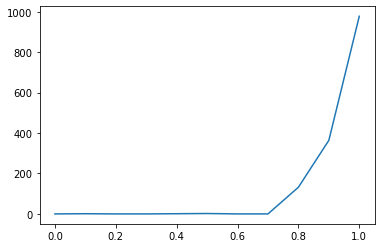

In [24]:
import matplotlib.pyplot as plt
x=[0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]
plt.plot(x,numam)
plt.show()

In [25]:
Name.shape

(2179, 2179)

In [26]:
undistlist=[]
for m in range(length_train):
    for n in range(m+1,length_train):
        if label[m][n]==1:
            undistlist.append(Name[m][n])
print(len(undistlist)) 

2371409


In [27]:
undatasimple=[round(i,1) for i in undistlist]
undistam=[]
for i in range(11):
    undistam.append(countnum(undatasimple,0+0.1*i))
print(undistam)  

[70, 139, 302, 0, 1342, 4334, 0, 0, 210828, 619426, 1476368]


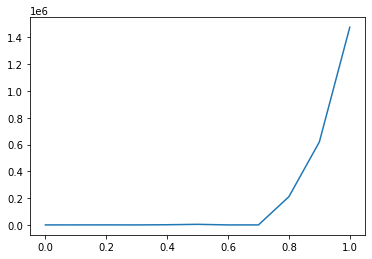

In [28]:
import matplotlib.pyplot as plt
x=[0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]
plt.plot(x,undistam)
plt.show()